In [85]:
import os
import sys 
root_path = os.path.dirname(os.getcwd())
sys.path.insert(0, root_path)

In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import plotly.express as px

In [87]:
# Chosing a color
fig = px.colors.qualitative.swatches()
# fig.show()
my_colors = px.colors.qualitative.G10

In [88]:
result_file_path = "/home/rocabrera/Desktop/nn-info-pgc/project/results/discrete/make_circles_3/bins10_epochs200_arch5_lr0.15_samplepct1.csv"

df = pd.read_csv(result_file_path, sep=";")
df = df.astype({"layer":str})

scaler = MinMaxScaler()
df[["I(X,T)", "I(Y,T)"]] = scaler.fit_transform(df[["I(X,T)", "I(Y,T)"]])
df = df.round(3)

Tentar entender as duas fases!

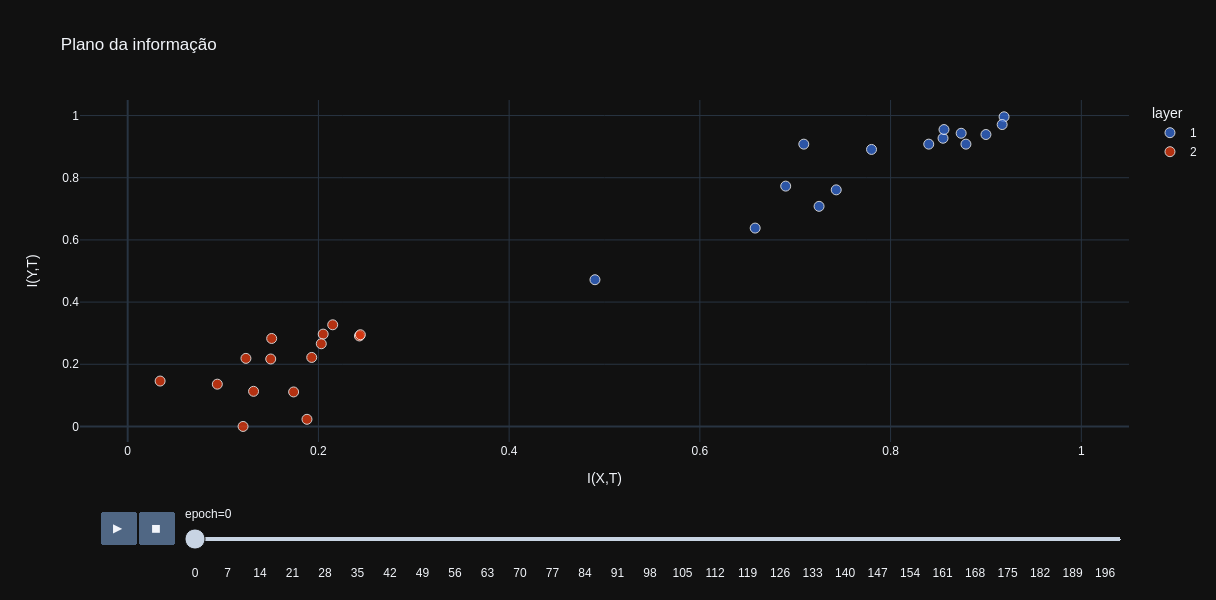

In [90]:
fig = px.scatter(df,#.query("rand_init==10"), 
           x="I(X,T)", 
           y="I(Y,T)", 
           animation_frame="epoch", 
           color="layer", 
           color_discrete_sequence = my_colors,
           hover_data=["accuracy", "rand_init"],
           width=700, 
           height=600,
           opacity=0.8,
           # trendline="ols", #lowess,
           title="Plano da informação",
           template= "plotly_dark", #"ggplot2",
           range_x=[-0.05, 1.05], 
           range_y=[-0.05, 1.05]
          )

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.update_traces(marker=dict(size=10,
                              line=dict(width=1,
                                        color='White')),
                  selector=dict(mode='markers'))
fig.show()